# Flask based api to connect to SQLite database and handle api calls from Langchain

## 0. Prerequisites/ Comments

<br /> 
<font size="3">
    
- This notebook contains code to create a Flask api which will run on port 5000 on localhost. It is assumed that no other server is running at this port on the localhost.

<br />
    
- The code in this notebook must be run to get the server up and running at http://127.0.0.1:5000. The code for the other attached notebook 'LangChain' has a dependency on this server being up.

<br />
    
- All the required packages have been mentioned in step 2. No other installations are required to run this notebook.

<br />
    
- The student.db file (in the same folder) is the sqlite db file that has been created with example data. It contains two tables: students, subject_scores. 
This student.db file can be kept in the same folder as the python notebook to work. For reference, all the SQL statements to create the student.db have also been included in the notebook as commented out lines. Code to add rows to the table are included in the notebook 'LangChain' as commented out lines.
    
</font>

## 1a. Running Instructions

<br /> 
<font size="3">
1. All the cells can be run individually, or for similicity, from the menu, choose 'Kernel-> Restart  & Run All'
After all the cells have run, the server can be checked to work fine at http://127.0.0.1:5000.
</font>
        
## 1b. Testing Instructions

<br /> 
<font size="3">
1. All routes in the app have been tested using Postman during development. Similar testing can be done using curl.
</font>

## 2. Install the required packages

In [1]:
!pip -q install flask
!pip -q install flask_cors

## 3. import the required libraries

In [2]:
#Library to handle json format
import json

#SQLite database related libraries
import sqlite3

#Flask related libraries
from flask import Flask, request, jsonify
from flask_cors import CORS

## 4. Setup SQLite database and tables 

#### Note: For Postgres database, adapt step 4a to connect to the desired database

### 4a. Connect to the SQLite database and return a connection 

#### Note: For Postgres database, adapt this function to connect to the desired database

In [3]:
def connect_to_db():
    conn = None
    try:
        conn = sqlite3.connect('student.db')
    except sqlite3.Error as e:
        print("Error while connecting to SQLite database:", e)
    return conn

### 4b. Create database tables for Students and Scores

In [4]:
def create_db_table(query):
    try:
        conn = connect_to_db()

        conn.execute(query)

        conn.commit()
        print("Table created successfully")
    except:
        print("Table creation failed")
    finally:
        conn.close()



### NOTE: Code below to create tables (commented out, only needed to run once in the beginning)

In [5]:
#Create the Students db table
# students_query = '''
#             CREATE TABLE students (
#                 id INTEGER PRIMARY KEY NOT NULL,
#                 first_name TEXT NOT NULL,
#                 last_name TEXT NOT NULL
#             );
#         '''
# create_db_table(students_query)


#Code to create the subject_scores table
# subject_scores_query = '''
#             CREATE TABLE subject_scores (
#                 id INTEGER PRIMARY KEY NOT NULL,
#                 st_id INTEGER NOT NULL,
#                 subject TEXT NOT NULL,
#                 score DOUBLE NOT NULL,
#                 FOREIGN KEY(st_id) REFERENCES students(id)
#             );
#         '''
# create_db_table(subject_scores_query)




## 5. Functions to handle api calls

### 5a. Function to handle api call to insert a new student to the students table

#### Note

<br /> 
<font size="3">
- This function is used to test the api, and is not directly used by from the Langchain code
</font>

In [6]:
def insert_student(user):
    """
    Code to handle the POST api call to insert a new student.

    Args:
        score: A dictionary containing the record of student to be inserted in the database table

    Returns:
        dict: Dictionary containing the inserted student record.
    """
    inserted_student = {}
    try:
        conn = connect_to_db()
        cur = conn.cursor()
        cur.execute("INSERT INTO students (id, first_name, last_name) VALUES (?, ?, ?)", (user['id'],   user['first_name'], user['last_name']) )
        conn.commit()
        inserted_student = get_student_by_id(cur.lastrowid)
    except:
        conn().rollback()

    finally:
        conn.close()

    return inserted_student

### 5b. Function to handle api call to insert a new score to the subject_scores table

#### Note

<br /> 
<font size="3">

- This function is used to test the api, and is not directly used by from the Langchain code
    
</font>

In [7]:
def insert_score(score):
    """
    Code to handle the POST api call to insert a score for a particular student.

    Args:
        score: A dictionary containing the record of score to be inserted in the database table

    Returns:
        dict: Dictionary containing the inserted score record.
    """
    inserted_score = {}
    try:
        conn = connect_to_db()
        cur = conn.cursor()
        cur.execute("INSERT INTO subject_scores (id, st_id, subject, score) VALUES (?, ?, ?, ?)", (score['id'],   score['st_id'], score['subject'], score['score']) )
        conn.commit()
        inserted_score = get_score_by_id(cur.lastrowid)
    except:
        conn().rollback()

    finally:
        conn.close()

    return inserted_score

In [8]:
student = {
    "id": "1",
    "first_name": "John",
    "last_name": "Doe",
    "subject": "MAths",
    "score": "10"
}

### 5c. Function to handle api call to get all students as a GET request

#### Note

<br /> 
<font size="3">
- This function is used to test the api, and is not directly used by from the Langchain code
</font>

In [9]:
def get_students():
    """
    Code to handle the GET api call to get all student details

    Args:
        None

    Returns:
        dict: Dictionary containing all student details.
    """
    users = []
    try:
        conn = connect_to_db()
        conn.row_factory = sqlite3.Row
        cur = conn.cursor()
        cur.execute("SELECT * FROM students")
        rows = cur.fetchall()

        # convert row objects to dictionary
        for i in rows:
            user = {}
            user["id"] = i["id"]
            user["first_name"] = i["first_name"]
            user["last_name"] = i["last_name"]
            users.append(user)

    except:
        users = []

    return users




### 5d. Function to handle api call to get a student details as a GET request

#### Note

<br /> 
<font size="3">
    
- This function is used to test the api, and is not directly used by from the Langchain code
    
</font>

In [10]:
def get_student_by_id(student_id):
    """
    Code to handle the GET api call to get a student by its id

    Args:
        student_id: id for the student for which details are needed.

    Returns:
        dict: Dictionary containing student details with the id.
    """
    user = {}
    try:
        conn = connect_to_db()
        conn.row_factory = sqlite3.Row
        cur = conn.cursor()
        cur.execute("SELECT * FROM students WHERE id = ?", 
                       (student_id,))
        row = cur.fetchone()

        # convert row object to dictionary
        user["id"] = row["id"]
        user["first_name"] = row["first_name"]
        user["last_name"] = row["last_name"]
    except:
        user = {}

    return user

### 5e. Functions to handle the api call to get query results based on input query

#### Note

<br /> 
<font size="3">

- The input query is in json format
- The response is in json format containing the query output
- Support for two different types of queries is added: Insert and Select
- For all other unsupported queries, a graceful message is returned.
    
</font>

In [11]:
def select_handler(cur):
    """
    Code to handle a SELECT query statement response.
    The output rows and columns are composed into json format and returned.

    Args:
        cur: cursor for the database to fetch query results.

    Returns:
        json: The SELECT query response in json formate.
    """
    #Fetch Data
    columns = [column[0] for column in cur.description]
    data = [dict(zip(columns, row)) for row in cur.fetchall()]
    #Convert to JSON
    json_data = json.dumps(data, indent=4)
    return json_data

def insert_handler(cur):
    """
    Code to handle an INSERT query statement response.

    Args:
        cur: cursor for the database to fetch query results.

    Returns:
        json: The status in json format indicating that the records have been successfully added.
    """
    json_data = {"status": "Successfully added records."}
    return json_data

def unsupported_handler(cur):
    """
    Code to handle an unsupported query statement response.

    Args:
        cur: cursor for the database to fetch query results.

    Returns:
        json: The status in json format indicating that the operation is currently not supported by
              the database.
    """
    json_data = {"status": "This operation is currently not supported by the system."}
    return json_data    

def get_handler_type(query):
    """
    Code to return the type of query: INSERT, SELECT, or unsupported type

    Args:
        query: input query for which the type needs to be determined.

    Returns:
        string: String denoting the type of the query
    """
    if query.lower().startswith("insert"):
        return "insert"
    elif query.lower().startswith("select"):
        return "select"
    else:
        return "unsupported"
    
#A dictionary containing handler function names per supported SQL statement type.
handlers = {
    "insert": insert_handler, 
    "select": select_handler,
    "unsupported": unsupported_handler
}

def run_student_query(query):
    """
    Code to run a student's query and return output as json.

    Args:
        query: input query which needs to be executed.

    Returns:
        json: Input query response in json format.
    """
    json_data = {}
    try:
        conn = connect_to_db()
        cur = conn.cursor()
        q = query['qstring']
        print("Before executing query.")
        cur.execute(q)
        print("After executing query. ")
        conn.commit()
        
        json_data = handlers[get_handler_type(q)](cur)
                
    except Exception as e:
        print(repr(e))
        conn().rollback()

    finally:
        cur.close()
        conn.close()
    return json_data


## 6. Create Flask routes for GET and POST requests

In [12]:
app = Flask(__name__)
CORS(app, resources={r"/*": {"origins": "*"}})

@app.route('/')  # Creating a route decorator for the root URL.
def welcome():  # Defining a function to handle requests to the root URL.
    return "Hello, Welcome to Student API"  # Returning a welcome message when accessing the root URL.

@app.route('/api/students', methods=['GET']) # Creating a GET request route to get all students.
def api_get_students():
    return jsonify(get_students())

@app.route('/api/student/<student_id>', methods=['GET']) # Creating a GET request route to get student by id.
def api_get_student(student_id):
    return jsonify(get_student_by_id(student_id))

@app.route('/api/student/add',  methods = ['POST']) # Creating a POST request route to add a student.
def api_add_student():
    student = request.get_json()
    return jsonify(insert_student(student))

@app.route('/api/student/query',  methods = ['POST']) # Creating a POST request route to handle a query in json format.
def api_run_query():
    query = request.get_json()
    return run_student_query(query)

## 7. Run the Flask app

#### Note:

- Once the below cell is run, the app will run at: http://127.0.0.1:5000 (snapshot below)
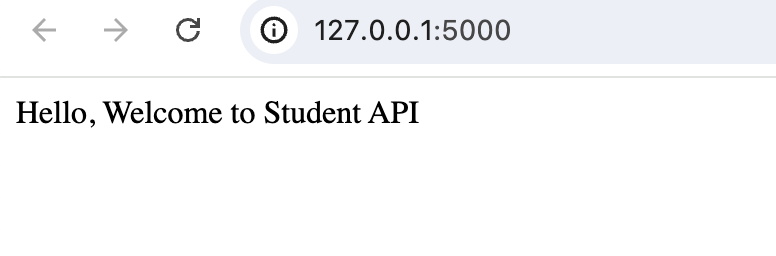

In [ ]:
if __name__ == "__main__":
    #app.run(debug=True)
    app.run() #run app

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
